In [1]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('data/occupation_exposure_eval_data_try.xlsx')
# data = data.iloc[:15]
data
# data.head()

,Occupation,exposure_azka,exposure_talitha,exposure_oki,exposure_average,exposure_keyword_subset_webb,exposure_keyword_subset_johann,exposure_keyword_subset_siahaan,exposure_keyword_subset_new_pattern,exposure_keyword_verb_webb,...,label_task_verb_noun_siahaan,label_task_verb_noun_new_pattern,label_task_verb_noun2_webb,label_task_verb_noun2_johann,label_task_verb_noun2_siahaan,label_task_verb_noun2_new_pattern,label_task_all_pos_webb,label_task_all_pos_johann,label_task_all_pos_siahaan,label_task_all_pos_new_pattern
0,Legislators,0.175000,0.187500,0.062500,0.181250,1.000000,1.000000,1.000000,1.000000,0.857143,...,2,3,2,2,2,3,1,1,1,1
1,Finance Managers,0.412500,0.625000,0.062500,0.518750,1.000000,1.000000,1.000000,1.000000,1.000000,...,1,3,1,3,1,3,1,1,1,1
2,Agricultural and Forestry Production Managers,0.650000,0.625000,0.250000,0.637500,1.000000,1.000000,1.000000,1.000000,0.952381,...,3,3,2,2,3,3,1,1,1,1
3,Hotel Managers,0.400000,0.650000,0.150000,0.525000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3,3,1,1,3,3,1,1,1,1
4,Physicists and Astronomers,0.390909,0.618182,0.090909,0.504545,1.000000,1.000000,1.000000,1.000000,1.000000,...,3,3,3,3,3,3,2,2,1,1
5,Generalist Medical Practitioners,0.336364,0.272727,0.227273,0.304545,1.000000,1.000000,1.000000,1.000000,1.000000,...,3,3,2,2,3,3,2,2,1,1
6,University and Higher Education Teachers,0.444444,0.333333,0.111111,0.388889,0.900000,0.916667,0.900000,0.923077,0.900000,...,3,3,2,2,3,3,1,1,1,1
7,Accountants,0.550000,0.200000,0.312500,0.375000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3,3,1,1,2,3,1,1,1,1
8,Systems Analysts,0.500000,0.500000,0.142857,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3,3,3,3,3,3,2,2,1,1
9,Lawyers,0.210000,0.142857,0.150000,0.176429,1.000000,1.000000,1.000000,1.000000,0.928571,...,2,3,1,2,2,3,1,1,1,1


In [3]:
# label_data = data[['label_keyword_subset_webb',	'label_keyword_subset_johann',	'label_keyword_subset_siahaan',	'label_keyword_subset_new_pattern',	'label_keyword_verb_webb',	'label_keyword_verb_johann',	'label_keyword_verb_siahaan',	'label_keyword_verb_new_pattern',	'label_keyword_verb_noun_webb',	'label_keyword_verb_noun_johann',	'label_keyword_verb_noun_siahaan',	'label_keyword_verb_noun_new_pattern', 'label_keyword_verb_noun2_webb',	'label_keyword_verb_noun2_johann',	'label_keyword_verb_noun2_siahaan',	'label_keyword_verb_noun2_new_pattern',	'label_keyword_all_pos_webb',	'label_keyword_all_pos_johann',	'label_keyword_all_pos_siahaan',	'label_keyword_all_pos_new_pattern',	'label_task_subset_webb',	'label_task_subset_johann',	'label_task_subset_siahaan',	'label_task_subset_new_pattern',	'label_task_verb_webb',	'label_task_verb_johann',	'label_task_verb_siahaan',	'label_task_verb_new_pattern',	'label_task_verb_noun_webb',	'label_task_verb_noun_johann',	'label_task_verb_noun_siahaan',	'label_task_verb_noun_new_pattern',	'label_task_verb_noun2_webb',	'label_task_verb_noun2_johann',	'label_task_verb_noun2_siahaan',	'label_task_verb_noun2_new_pattern', 'label_task_all_pos_webb',	'label_task_all_pos_johann',	'label_task_all_pos_siahaan',	'label_task_all_pos_new_pattern',	'label_oki']]
exposure_data = data[['exposure_keyword_subset_webb',	'exposure_keyword_subset_johann',	'exposure_keyword_subset_siahaan',	'exposure_keyword_subset_new_pattern',	'exposure_keyword_verb_webb',	'exposure_keyword_verb_johann',	'exposure_keyword_verb_siahaan',	'exposure_keyword_verb_new_pattern',	'exposure_keyword_verb_noun_webb',	'exposure_keyword_verb_noun_johann',	'exposure_keyword_verb_noun_siahaan',	'exposure_keyword_verb_noun_new_pattern', 'exposure_keyword_verb_noun2_webb',	'exposure_keyword_verb_noun2_johann',	'exposure_keyword_verb_noun2_siahaan',	'exposure_keyword_verb_noun2_new_pattern',	'exposure_keyword_all_pos_webb',	'exposure_keyword_all_pos_johann',	'exposure_keyword_all_pos_siahaan',	'exposure_keyword_all_pos_new_pattern',	'exposure_task_subset_webb',	'exposure_task_subset_johann',	'exposure_task_subset_siahaan',	'exposure_task_subset_new_pattern',	'exposure_task_verb_webb',	'exposure_task_verb_johann',	'exposure_task_verb_siahaan',	'exposure_task_verb_new_pattern',	'exposure_task_verb_noun_webb',	'exposure_task_verb_noun_johann',	'exposure_task_verb_noun_siahaan',	'exposure_task_verb_noun_new_pattern',	'exposure_task_verb_noun2_webb',	'exposure_task_verb_noun2_johann',	'exposure_task_verb_noun2_siahaan',	'exposure_task_verb_noun2_new_pattern', 'exposure_task_all_pos_webb',	'exposure_task_all_pos_johann',	'exposure_task_all_pos_siahaan',	'exposure_task_all_pos_new_pattern',	'exposure_average']]

In [4]:
# function to calculate MAE, MSE, RMSE for all columns

def calculate_metrics(data, expected_column='exposure_average'):
    results = []
    
    for column in data.columns:
        if column != expected_column:
            mae = mean_absolute_error(data[expected_column], data[column])
            mse = mean_squared_error(data[expected_column], data[column])
            rmse = np.sqrt(mse)
            results.append((column, mae, mse, rmse))
    
    results.sort(key=lambda x: x[2], reverse=False)  # Sort by F1 score
    
    results_data = pd.DataFrame(results, columns=['Column', 'MAE', 'MSE', 'RMSE'])
    
    return results_data

eval_result = calculate_metrics(exposure_data)
eval_result.sort_values(by=['Column'])


,Column,MAE,MSE,RMSE
5,exposure_keyword_all_pos_johann,0.272363,0.115973,0.340548
16,exposure_keyword_all_pos_new_pattern,0.323350,0.166741,0.408339
14,exposure_keyword_all_pos_siahaan,0.319053,0.162849,0.403546
4,exposure_keyword_all_pos_webb,0.272175,0.115961,0.340531
31,exposure_keyword_subset_johann,0.641991,0.470833,0.686173
37,exposure_keyword_subset_new_pattern,0.648989,0.482215,0.694417
33,exposure_keyword_subset_siahaan,0.647970,0.480946,0.693503
29,exposure_keyword_subset_webb,0.640447,0.468820,0.684704
25,exposure_keyword_verb_johann,0.626521,0.450905,0.671495
26,exposure_keyword_verb_new_pattern,0.632071,0.460402,0.678529


In [5]:
# function to calculate precision, recall, f1 score for all columns

def calculate_metrics(data, expected_column='label_oki'):
    results = []
    
    for column in data.columns:
        if column != expected_column:
            precision = precision_score(data[expected_column], data[column], average='macro')
            recall = recall_score(data[expected_column], data[column], average='macro')
            f1 = f1_score(data[expected_column], data[column], average='macro')
            results.append((column, precision, recall, f1))
    
    results.sort(key=lambda x: x[3], reverse=True)  # Sort by F1 score
    
    results_data = pd.DataFrame(results, columns=['Column', 'Precision', 'Recall', 'F1 Score'])
    
    return results_data

eval_result = calculate_metrics(label_data)
eval_result.sort_values(by=['F1 Score'])


NameError: name 'label_data' is not defined

In [ ]:
# function to show detail evaluation for a column
def evaluate_predictions(y_true, y_pred):
    # Calculate precision, recall, F1-score, and support for each class
    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average=None)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate micro-average precision, recall, F1-score
    micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='micro')

    # Calculate macro-average precision, recall, F1-score
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')

    # Print results
    print("Class\t\tPrecision\tRecall\t\tF1-score\tSupport")
    for i in range(len(precision)):
        print(f"Class {i+1}\t\t{precision[i]:.2f}\t\t{recall[i]:.2f}\t\t{f1[i]:.2f}\t\t{support[i]}")
    print(f"\nAccuracy: {accuracy:.2f}")
    print(f"Micro-average precision: {micro_precision:.2f}")
    print(f"Micro-average recall: {micro_recall:.2f}")
    print(f"Micro-average F1-score: {micro_f1:.2f}")
    print(f"Macro-average precision: {macro_precision:.2f}")
    print(f"Macro-average recall: {macro_recall:.2f}")
    print(f"Macro-average F1-score: {macro_f1:.2f}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()



Evaluation for label_webb:
Class		Precision	Recall		F1-score	Support
Class 1		0.58		0.82		0.68		22
Class 2		0.62		0.42		0.50		12
Class 3		0.00		0.00		0.00		6

Accuracy: 0.57
Micro-average precision: 0.57
Micro-average recall: 0.57
Micro-average F1-score: 0.57
Macro-average precision: 0.40
Macro-average recall: 0.41
Macro-average F1-score: 0.39


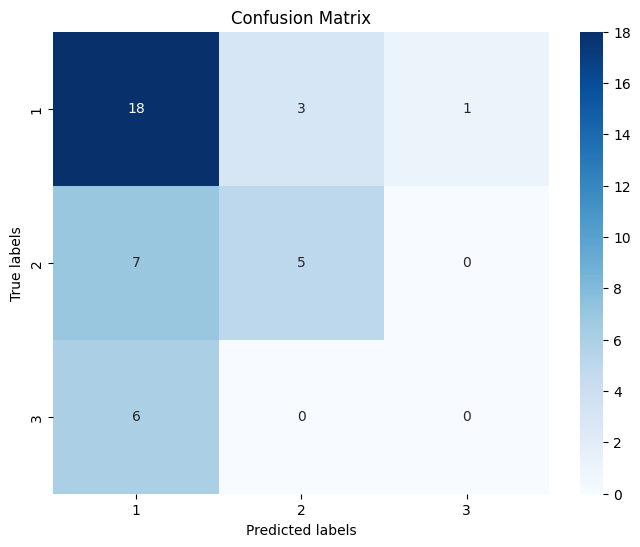

In [ ]:
# Subset match

y_true = data['label_oki']
y_pred_webb = data['label_keyword_all_pos_webb']

print("\nEvaluation for label_webb:")
evaluate_predictions(y_true, y_pred_webb)